In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pathdata = '/home/daniu/Documentos/fundar/indice-mercado-trabajo-ingresos/'
pathdata = '/home/daniufundar/Documents/Fundar/indice-mercado-trabajo-ingresos/'
pathdata = '/Users/danielarisaro/Documents/fundar/indice-mercado-trabajo-ingresos/'

df_people_2021 = pd.read_csv(pathdata + 'data_input/personas_tot_urb_3T_21.txt', delimiter=';', low_memory=False)
df_people_2020 = pd.read_csv(pathdata + 'data_input/personas_tot_urb_3T_20.txt', delimiter=';', low_memory=False)


In [6]:
num_strata_2021 = len(df_people_2021['PONDERA'].unique())
num_strata_2020 = len(df_people_2020['PONDERA'].unique())
print("Number of strata in 2021 survey:", num_strata_2021)
print("Number of strata in 2020 survey:", num_strata_2020)


Number of strata in 2021 survey: 2689
Number of strata in 2020 survey: 2459


In [7]:
print('Cantidad de registros 2020:', len(df_people_2020))
print('Cantidad de registros 2021:', len(df_people_2021))
print('Cantidad de registros coincidentes entre 2020 y 2021:', len(list(set(df_people_2020['CODUSU']) & set(df_people_2020['CODUSU']))))

Cantidad de registros 2020: 63162
Cantidad de registros 2021: 78217
Cantidad de registros coincidentes entre 2020 y 2021: 20428


In [16]:
income_dist_2021 = df_people_2021.apply(lambda x: x['P47T']*x['PONDII'], axis=1)
income_dist_2020 = df_people_2020.groupby('CH04').apply(lambda x: x['P47T']*x['PONDII'])


In [28]:
income_dist_2021 = df_people_2021[['CH04','P47T','PONDII']].copy()
income_dist_2021['Weighted Income'] = df_people_2021.apply(lambda x: x['P47T']*x['PONDII'], axis=1)


In [29]:
income_dist_2021

,CH04,P47T,PONDII,Weighted Income
0,2,-9.0,0,-0.0
1,2,0.0,2615,0.0
2,2,0.0,1340,0.0
3,2,0.0,1127,0.0
4,2,-9.0,0,-0.0
...,...,...,...,...
78212,1,12000.0,504,6048000.0
78213,1,14000.0,500,7000000.0
78214,2,30000.0,481,14430000.0
78215,2,29000.0,505,14645000.0


(-50000000.0, 65000000.0)

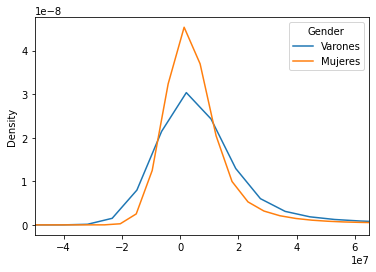

In [48]:
income_dist_2021.groupby('CH04')['Weighted Income'].plot(kind='kde')
plt.legend(['Varones', 'Mujeres'], title='Gender')
plt.xlim([-50000000, 65000000])

In [ ]:


plt.figure(figsize=(12, 8))
sns.violinplot(data=[income_dist_2021, income_dist_2020], cut=0, inner='stick', scale='count', scale_hue=False)
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Distribution of income')
plt.show()
